In [ ]:
import pandas as pd
import warnings
import pyodbc 
import pygrametl
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)
import numpy as np
from sklearn import cluster 
from matplotlib import pyplot as plt
import tkinter
from scipy.cluster.hierarchy import dendrogram, linkage,fcluster
from pandas.plotting import scatter_matrix 
from sklearn import metrics
from apyori import apriori
from sklearn import metrics
import numpy as np
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.tree import export_text
import catboost as cb
from catboost import Pool
from sklearn.metrics import classification_report
from pandas.api.types import is_numeric_dtype
import imblearn
from collections import Counter
from imblearn.over_sampling import BorderlineSMOTE
from matplotlib import pyplot
from numpy import where
from sklearn.metrics import recall_score

oversample =imblearn.over_sampling.RandomOverSampler(sampling_strategy='minority')

In [ ]:
#from pandas_profiling import ProfileReport

In [ ]:
pcon= pyodbc.connect('Driver={SQL Server};'
                      'Server=KHALILSRIDI;'
                      'Database=PharmaDWF;'
                      'Trusted_Connection=yes;')
conn4 = pygrametl.ConnectionWrapper(connection=pcon)

In [ ]:
df= pd.read_sql_query('SELECT * FROM Dim_Article a inner join fact_achat ach on ach.Item_pk=a.Item_pk ',pcon)

In [ ]:
results_prediction_vente=[]
recall_prediction_vente=[]
modele_prediction_vente=[]

results_prediction_category_id=[]
recall_prediction_category_id=[]
modele_prediction_category_id=[]

results_prediction_categorie_vente=[]
recall_prediction_categorie_vente=[]
modele_prediction_categorie_vente=[]

In [ ]:
df_achat=df[['CodeForme','CodeCategorie','Provider_PK','Date_Id','PrixAchatHT']]

In [ ]:
#instanciation de l'objet
sc = StandardScaler()
#transformation – centrage-réduction
df_achat_n= sc.fit_transform(df_achat)
print(df_achat_n)

[[ 1.31225824 -0.48887038 -0.43858136  1.36251493 -0.22965034]
 [-0.41504688  0.00327534  1.49452806  0.58197942 -0.3175707 ]
 [-0.41504688 -0.48887038 -0.97805376  0.84215792  0.56828229]
 ...
 [-0.45103241  0.49542107  1.60691815  0.98407347  0.41844827]
 [-0.45103241  0.49542107  1.60691815  1.07868383  0.41844827]
 [-0.45103241  0.49542107  1.9440884  -0.38777681  0.41839902]]


# Choix de k 

[0.43750709 0.29710412 0.30819915 0.31036564 0.33377509]


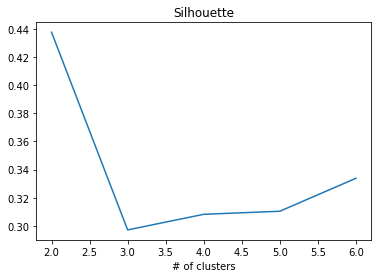

In [ ]:
res = np.arange(5,dtype="double") 
for k in np.arange(5): 
  km = cluster.KMeans(n_clusters=k+2) 
  km.fit(df_achat_n) 
  res[k] = metrics.silhouette_score(df_achat_n,km.labels_)
print(res)
#graphique 
import matplotlib.pyplot as plt 
plt.title("Silhouette") 
plt.xlabel("# of clusters") 
plt.plot(np.arange(2,7,1),res) 
plt.show()

# k=3

In [ ]:
kmeans = cluster.KMeans(n_clusters=3)
kmeans.fit(df_achat)
#index triés des groupes 
idk = np.argsort(kmeans.labels_)
#affichage des observations et leurs groupes 
print(pd.DataFrame(df_achat.index[idk],kmeans.labels_[idk]))
kmeans.labels_
#distances aux centres de classes des observations 
print(kmeans.transform(df_achat))

        0
0       0
0    6346
0    6345
0    6343
0   12620
..    ...
2   10734
2   10730
2   10729
2   10790
2   19232

[19233 rows x 1 columns]
[[ 41.40521916  96.67026857 127.41785261]
 [ 97.63000686  94.84643308  42.39382378]
 [ 22.315685    76.78058515 133.63188071]
 ...
 [101.45979736 109.71039641  57.67786711]
 [101.58406936 112.40045421  61.50481112]
 [129.45645345  98.06181899  16.94762142]]


In [ ]:
print(pd.Series(kmeans.labels_).value_counts())

1    8130
0    7461
2    3642
dtype: int64


In [ ]:
df_achat['Labels']=pd.Series(kmeans.labels_)

In [ ]:
df_achat['Labels']

0        0
1        2
2        0
3        0
4        0
        ..
19228    1
19229    2
19230    2
19231    2
19232    2
Name: Labels, Length: 19233, dtype: int32

In [ ]:
df_achat

,CodeForme,CodeCategorie,Provider_PK,Date_Id,PrixAchatHT,Labels
0,61,10,53,2567,7.242,0
1,13,11,139,2534,5.457,2
2,13,10,29,2545,23.442,0
3,13,10,34,2532,23.442,0
4,13,10,34,2555,23.442,0
...,...,...,...,...,...,...
19228,12,12,51,2489,20.399,1
19229,12,12,144,2506,20.400,2
19230,12,12,144,2551,20.400,2
19231,12,12,144,2555,20.400,2


In [ ]:
df_achat_0=df_achat.groupby(['Labels']).get_group(0)

In [ ]:
df_achat_0.describe()

,CodeForme,CodeCategorie,Provider_PK,Date_Id,PrixAchatHT,Labels
count,7461.000000,7461.000000,7461.000000,7461.000000,7461.000000,7461.0
mean,24.906983,11.023321,43.688112,2549.828977,12.659272,0.0
std,28.022878,2.028085,18.191177,19.503027,24.679207,0.0
min,1.000000,8.000000,4.000000,2503.000000,0.075000,0.0
25%,1.000000,10.000000,34.000000,2533.000000,2.591000,0.0
50%,13.000000,10.000000,49.000000,2552.000000,6.104000,0.0
75%,46.000000,11.000000,53.000000,2567.000000,14.800000,0.0
max,157.000000,21.000000,114.000000,2583.000000,959.071000,0.0


In [ ]:
df_achat_0.to_csv('df_achat_0')

In [ ]:
df_achat_1=df_achat.groupby(['Labels']).get_group(1)

In [ ]:
df_achat_1.describe()

,CodeForme,CodeCategorie,Provider_PK,Date_Id,PrixAchatHT,Labels
count,8130.000000,8130.000000,8130.000000,8130.000000,8130.000000,8130.0
mean,24.146494,10.972817,63.250677,2478.293973,11.203670,1.0
std,27.607161,2.019739,25.581252,21.148769,17.314501,0.0
min,1.000000,0.000000,6.000000,2436.000000,0.011000,1.0
25%,1.000000,10.000000,51.000000,2462.000000,2.535000,1.0
50%,12.000000,10.000000,52.000000,2478.000000,5.544000,1.0
75%,45.000000,11.000000,88.000000,2495.000000,13.622000,1.0
max,110.000000,21.000000,100.000000,2523.000000,773.434000,1.0


In [ ]:
df_achat_2=df_achat.groupby(['Labels']).get_group(2)

In [ ]:
df_achat_2.describe()

,CodeForme,CodeCategorie,Provider_PK,Date_Id,PrixAchatHT,Labels
count,3642.000000,3642.000000,3642.000000,3642.00000,3642.000000,3642.0
mean,24.633443,10.977759,152.232290,2495.98682,11.922561,2.0
std,27.712197,2.066672,8.034523,44.43355,16.057325,0.0
min,1.000000,8.000000,114.000000,2436.00000,0.157000,2.0
25%,1.000000,10.000000,144.000000,2449.00000,2.742000,2.0
50%,12.500000,10.000000,153.000000,2495.00000,6.162000,2.0
75%,45.000000,11.000000,159.000000,2532.00000,14.201000,2.0
max,110.000000,21.000000,183.000000,2583.00000,177.621000,2.0


array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>],
       [<AxesSubplot:title={'center':'2'}>, <AxesSubplot:>]], dtype=object)

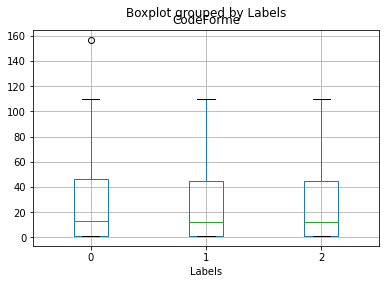

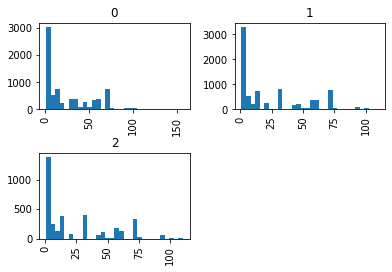

In [ ]:
df_achat.boxplot(column="CodeForme",by="Labels")
#Histogramme
df_achat.hist(column="CodeForme",by="Labels",bins=30)

array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>],
       [<AxesSubplot:title={'center':'2'}>, <AxesSubplot:>]], dtype=object)

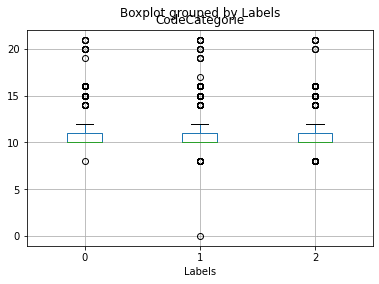

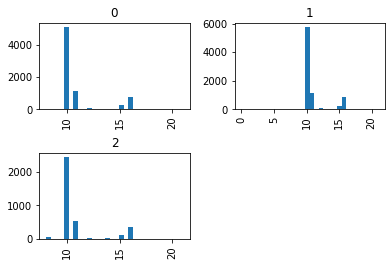

In [ ]:

df_achat.boxplot(column="CodeCategorie",by="Labels")
#Histogramme
df_achat.hist(column="CodeCategorie",by="Labels",bins=30)

array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>],
       [<AxesSubplot:title={'center':'2'}>, <AxesSubplot:>]], dtype=object)

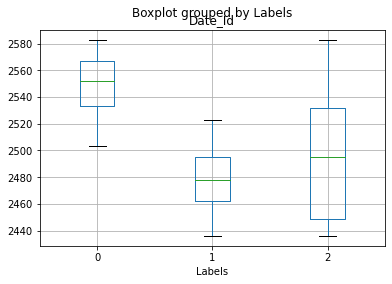

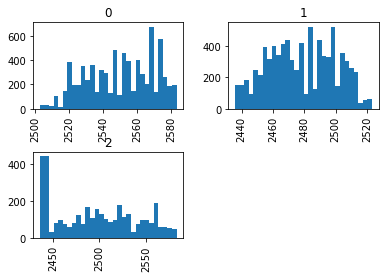

In [ ]:

df_achat.boxplot(column="Date_Id",by="Labels")
#Histogramme
df_achat.hist(column="Date_Id",by="Labels",bins=30)

* On remarque que le date_id est une variable décisive au niveau du classement des achats.
* Label 0: 2450 < Date_ID < 2470 et 2495< Date_ID < 2530
* Label 1: 2460 < Date_ID < 2490
* Label 2: 2530 < Date_ID < 2570

*************************************************************************************

In [ ]:
pcon1= pyodbc.connect('Driver={SQL Server};'
                      'Server=KHALILSRIDI;'
                      'Database=pharma_DW;'
                      'Trusted_Connection=yes;')
conn5= pygrametl.ConnectionWrapper(connection=pcon1)

In [ ]:
df_Vente= pd.read_sql_query('SELECT * FROM Dim_Item a inner join fact_sale fs on fs.CodeArticle=a.Item_PK ',pcon1)

In [ ]:
df_Vente=df_Vente[['Category_ID','Shape_ID','CodeClient','CodeArticle','CodePersonnel','Date_D','Time','TotalTTC']]

In [ ]:
from sklearn.preprocessing import StandardScaler
#instanciation de l'objet
sc = StandardScaler()
#transformation – centrage-réduction
df_Vente_n= sc.fit_transform(df_Vente)
print(df_Vente_n)

[[-6.65507712  1.10213116  0.4839445  ... -1.08486232 -0.88685992
  -0.69027324]
 [-0.28279676  1.1763374  -0.69231093 ...  1.12297535 -1.34585083
  -0.34530287]
 [-0.28279676  1.1763374  -0.38944565 ...  1.2416763   0.30317675
  -0.80558281]
 ...
 [-0.28279676 -1.04984978  0.70434168 ... -0.23021548 -0.83411022
  -0.49108743]
 [-0.28279676  0.06324381  1.73929213 ... -1.22730346 -1.10642199
   3.20425916]
 [-0.28279676 -1.04984978 -0.2920272  ...  0.12588737 -1.85288163
   2.85843366]]


[0.12834513 0.15704502 0.16393246 0.15926329 0.15421774]


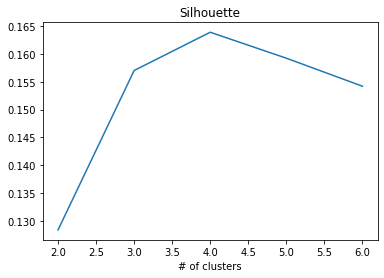

In [ ]:
res = np.arange(5,dtype="double") 
for k in np.arange(5): 
  km = cluster.KMeans(n_clusters=k+2) 
  km.fit(df_Vente_n) 
  res[k] = metrics.silhouette_score(df_Vente_n,km.labels_)
print(res)
#graphique 
import matplotlib.pyplot as plt 
plt.title("Silhouette") 
plt.xlabel("# of clusters") 
plt.plot(np.arange(2,7,1),res) 
plt.show()

# k=4

In [ ]:
kmeans = cluster.KMeans(n_clusters=4)
kmeans.fit(df_Vente)
#index triés des groupes 
idk = np.argsort(kmeans.labels_)
#affichage des observations et leurs groupes 
print(pd.DataFrame(df_Vente.index[idk],kmeans.labels_[idk]))
kmeans.labels_
#distances aux centres de classes des observations 
print(kmeans.transform(df_Vente))

       0
0      0
0   2460
0   1237
0   1235
0   2463
..   ...
3   8461
3   8460
3   8459
3   4663
3   5855

[11582 rows x 1 columns]
[[ 5492.22135842 20999.95893784 14718.19881412 24893.56891424]
 [ 6623.21655573 26244.38503741 15291.84953336 29433.77191662]
 [16208.6322952   8166.85227439 20999.97558895 15871.3703696 ]
 ...
 [15785.91620071 25383.34742123  6539.29065436 20569.72596802]
 [16075.88472905 28150.16906908  7288.98501851 23841.34985987]
 [18447.99173267 35425.84539174 11866.40386089 32082.97092367]]


In [ ]:
print(pd.Series(kmeans.labels_).value_counts())

3    4525
2    3888
1    1725
0    1444
dtype: int64


In [ ]:
df_Vente['Labels']=pd.Series(kmeans.labels_)

In [ ]:
df_Vente

,Category_ID,Shape_ID,CodeClient,CodeArticle,CodePersonnel,Date_D,Time,TotalTTC,Labels
0,0,59,22983,228911,23,2468,42558,17.605,0
1,10,61,20544,228913,25,2561,37198,41.003,0
2,10,61,21172,228913,29,2566,56455,9.784,1
3,10,59,25571,228940,24,2508,41982,104.470,0
4,10,59,24056,228940,24,2486,49266,23.165,0
...,...,...,...,...,...,...,...,...,...
11577,10,1,21963,249661,22,2540,38897,41.415,2
11578,10,1,22379,249661,23,2455,33677,41.000,2
11579,10,1,23440,249661,29,2504,43174,31.115,2
11580,10,31,25586,249688,29,2462,39994,281.756,2


In [ ]:
df_Vente_0=df_Vente.groupby(['Labels']).get_group(0)

In [ ]:
df_Vente_0.describe()

,Category_ID,Shape_ID,CodeClient,CodeArticle,CodePersonnel,Date_D,Time,TotalTTC,Labels
count,1444.000000,1444.000000,1444.000000,1444.000000,1444.000000,1444.000000,1444.000000,1444.000000,1444.0
mean,10.042936,22.177285,21866.594875,234082.987535,25.512465,2510.799169,41117.853878,68.092789,0.0
std,0.594114,24.866861,2068.097524,2853.900583,2.623099,41.454646,4682.919326,72.261009,0.0
min,0.000000,1.000000,17326.000000,228911.000000,22.000000,2436.000000,30919.000000,1.650000,0.0
25%,10.000000,1.000000,20631.000000,231882.000000,23.000000,2475.000000,37865.000000,27.668750,0.0
50%,10.000000,8.000000,21769.000000,234425.000000,26.000000,2511.000000,41719.500000,43.720000,0.0
75%,10.000000,48.000000,23351.000000,236506.000000,29.000000,2547.000000,44772.750000,79.370500,0.0
max,21.000000,100.000000,25981.000000,239035.000000,29.000000,2583.000000,51903.000000,619.811000,0.0


In [ ]:
df_Vente_1=df_Vente.groupby(['Labels']).get_group(1)

In [ ]:
df_Vente['CodeArticle'].value_counts()

247513    241
241434    220
241015    190
244201    126
236246    102
         ... 
241627      1
241629      1
241644      1
241717      1
249689      1
Name: CodeArticle, Length: 1601, dtype: int64

In [ ]:
df_Vente_2=df_Vente.groupby(['Labels']).get_group(2)

In [ ]:
df_Vente_2.describe()

,Category_ID,Shape_ID,CodeClient,CodeArticle,CodePersonnel,Date_D,Time,TotalTTC,Labels
count,3888.000000,3888.000000,3888.000000,3888.000000,3888.000000,3888.000000,3888.000000,3888.000000,3888.0
mean,10.688786,32.094393,21932.087706,243544.376800,25.273405,2511.886317,41410.168210,64.162814,2.0
std,1.906715,27.592482,2059.285565,2540.355161,2.613041,41.520459,4581.902882,62.702862,0.0
min,9.000000,0.000000,17326.000000,238767.000000,22.000000,2436.000000,30864.000000,1.160000,2.0
25%,10.000000,1.000000,20525.000000,241558.000000,23.000000,2476.000000,38472.000000,28.125000,2.0
50%,10.000000,31.000000,21852.000000,242568.000000,25.000000,2514.000000,41978.500000,45.320000,2.0
75%,10.000000,60.000000,23458.000000,245281.750000,29.000000,2548.000000,44928.000000,74.666000,2.0
max,16.000000,82.000000,25981.000000,249689.000000,29.000000,2583.000000,52071.000000,619.811000,2.0


In [ ]:
df_Vente_3=df_Vente.groupby(['Labels']).get_group(3)

In [ ]:
df_Vente_3.describe()

,Category_ID,Shape_ID,CodeClient,CodeArticle,CodePersonnel,Date_D,Time,TotalTTC,Labels
count,4525.000000,4525.000000,4525.000000,4525.000000,4525.000000,4525.000000,4525.000000,4525.000000,4525.0
mean,10.512265,31.266961,22099.082652,243455.079779,24.789392,2515.423867,62740.182983,63.750916,3.0
std,1.668383,27.009640,2059.054805,2608.864970,2.403224,42.448203,4769.765317,69.936621,0.0
min,9.000000,0.000000,17326.000000,238500.000000,22.000000,2436.000000,52071.000000,1.325000,3.0
25%,10.000000,1.000000,20893.000000,241478.000000,23.000000,2478.000000,58858.000000,26.945000,3.0
50%,10.000000,31.000000,22277.000000,242196.000000,24.000000,2517.000000,62982.000000,43.090000,3.0
75%,10.000000,58.000000,23466.000000,245366.000000,26.000000,2553.000000,66606.000000,75.280000,3.0
max,16.000000,110.000000,25966.000000,249661.000000,29.000000,2583.000000,74302.000000,904.822000,3.0


*********************************************************************************************

array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>],
       [<AxesSubplot:title={'center':'2'}>,
        <AxesSubplot:title={'center':'3'}>]], dtype=object)

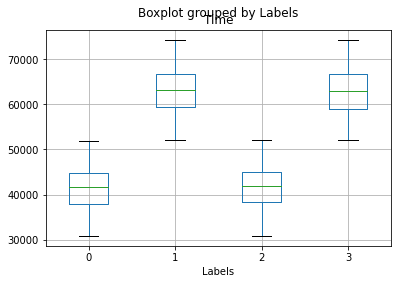

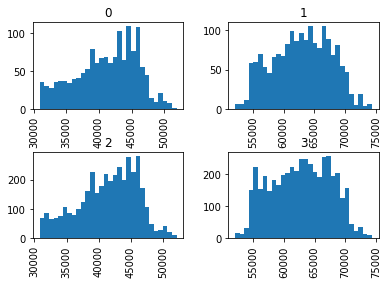

In [ ]:
df_Vente.boxplot(column="Time",by="Labels")
#Histogramme
df_Vente.hist(column="Time",by="Labels",bins=30)

* Label 1,3: 38000< Time <45000
* Label 0,2: 61000< Time <68000

array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>],
       [<AxesSubplot:title={'center':'2'}>,
        <AxesSubplot:title={'center':'3'}>]], dtype=object)

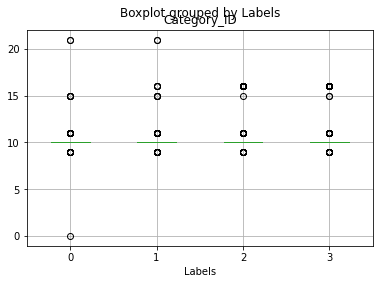

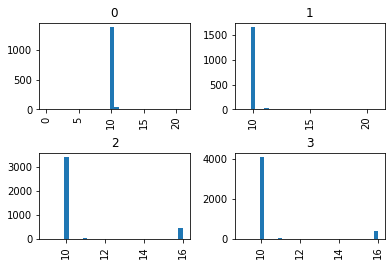

In [ ]:
df_Vente.boxplot(column="Category_ID",by="Labels")
#Histogramme
df_Vente.hist(column="Category_ID",by="Labels",bins=30)

* On peut noter que pour les deux labels 0 et 1 le Category_ID majoritaire est égale à 10 Sinon pour les labels 2 et 3 la plus part des Category_ID varient entre 10 et 12

## Association rule

In [ ]:
df_v= pd.read_sql_query('SELECT CodeArticle,concat(Date_D,Time,CodeClient)as pk from Fact_Sale',pcon1)

In [ ]:
df_v

,CodeArticle,pk
0,229095,25073931617326
1,229240,24546358517326
2,229240,25684304417326
3,229298,24944033017326
4,230093,25684304417326
...,...,...
11577,243767,25066824725966
11578,233864,24933835925981
11579,242944,24933835925981
11580,247513,24933835925981


In [ ]:
df_u=df_v['pk'].unique()
dataset=[]

for u in df_u:

    ch="SELECT fs.CodeArticle,Category_ID,concat(Date_D,Time,CodeClient) as pk from Fact_Sale fs join Dim_Item d on d.Item_PK=fs.CodeArticle where concat(Date_D,Time,CodeClient)='{}' and Category_ID != 10 and Category_ID != 9 ".format(u)
    df_ven= pd.read_sql_query(ch,pcon1)
    

  
    L=[]
    for i in df_ven.index:
        L.append(df_ven['CodeArticle'][i])
    
    if L!=[]:
        dataset.append(L)



In [ ]:
te=TransactionEncoder()
te_ary=te.fit(dataset).transform(dataset)    
df=pd.DataFrame(te_ary, columns=te.columns_)  

In [ ]:
frequent_itemsets=apriori(df, min_support=0.05, use_colnames=True) 
frequent_itemsets

,support,itemsets
0,0.067194,(243682)
1,0.098814,(243707)
2,0.071146,(243739)
3,0.106719,(243751)
4,0.059289,(243769)
5,0.055336,(243775)
6,0.055336,(243813)
7,0.071146,(243868)
8,0.118577,(243936)
9,0.098814,(244073)


In [ ]:
rules=association_rules(frequent_itemsets,metric="confidence",min_threshold=0.3)

rules['antecedents'][0]='IPECA 9 CH GR'
rules['antecedents'][1]='CUPRUM METALLICUM 9 CH GR'
rules['consequents'][0]='CUPRUM METALLICUM 9 CH GR'
rules['consequents'][1]='IPECA 9 CH GR'

In [ ]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(243682),(243751),0.067194,0.106719,0.059289,0.882353,8.267974,0.052118,7.592885
1,(243751),(243682),0.106719,0.067194,0.059289,0.555556,8.267974,0.052118,2.098814
2,(243936),(243751),0.118577,0.106719,0.067194,0.566667,5.309877,0.054539,2.061417
3,(243751),(243936),0.106719,0.118577,0.067194,0.629630,5.309877,0.054539,2.379842
4,(245104),(243751),0.146245,0.106719,0.055336,0.378378,3.545546,0.039729,1.437017
5,(243751),(245104),0.106719,0.146245,0.055336,0.518519,3.545546,0.039729,1.773183
6,(245104),(243936),0.146245,0.118577,0.067194,0.459459,3.874775,0.049852,1.630632
7,(243936),(245104),0.118577,0.146245,0.067194,0.566667,3.874775,0.049852,1.970204


In [ ]:
d= pd.read_sql_query('SELECT distinct(Item_ID) from Fact_Sale fs join Dim_Item d on d.Item_PK=fs.CodeArticle where CodeArticle=183084',pcon1)

In [ ]:
pcon2= pyodbc.connect('Driver={SQL Server};'
                      'Server=KHALILSRIDI;'
                      'Database=pharmaInit;'
                      'Trusted_Connection=yes;')
conn6= pygrametl.ConnectionWrapper(connection=pcon2)

In [ ]:
ch="SELECT Designation from Article where CodeArticle=5843"

In [ ]:
ch1=pd.read_sql_query(ch,pcon2)

In [ ]:
d= pd.read_sql_query('SELECT distinct(Item_ID) from Fact_Sale fs join Dim_Item d on d.Item_PK=fs.CodeArticle where CodeArticle=181916',pcon1)

In [ ]:
rules=association_rules(frequent_itemsets,metric="confidence",min_threshold=0.3)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(243682),(243751),0.067194,0.106719,0.059289,0.882353,8.267974,0.052118,7.592885
1,(243751),(243682),0.106719,0.067194,0.059289,0.555556,8.267974,0.052118,2.098814
2,(243936),(243751),0.118577,0.106719,0.067194,0.566667,5.309877,0.054539,2.061417
3,(243751),(243936),0.106719,0.118577,0.067194,0.629630,5.309877,0.054539,2.379842
4,(245104),(243751),0.146245,0.106719,0.055336,0.378378,3.545546,0.039729,1.437017
5,(243751),(245104),0.106719,0.146245,0.055336,0.518519,3.545546,0.039729,1.773183
6,(245104),(243936),0.146245,0.118577,0.067194,0.459459,3.874775,0.049852,1.630632
7,(243936),(245104),0.118577,0.146245,0.067194,0.566667,3.874775,0.049852,1.970204


In [ ]:
ch2=pd.read_sql_query(ch,pcon2)

In [ ]:
import networkx as nx  
def draw_graph(rules, rules_to_show):
    G1 = nx.DiGraph()   
    color_map=[]
    N = 50
    colors = np.random.rand(N)    
    strs=['R0', 'R1', 'R2','R3','R4','R5', 'R6', 'R7']     
    for i in range (rules_to_show):      
        G1.add_nodes_from(["R"+str(i)])
        for a in rules.iloc[i]['antecedents']:
                
            G1.add_nodes_from([a])
        
            G1.add_edge(a, "R"+str(i), color=colors[i] , weight = 2)
        for c in rules.iloc[i]['consequents']:
            G1.add_nodes_from([c]) 
            G1.add_edge("R"+str(i), c, color=colors[i],  weight=2)
    for node in G1:
        found_a_string = False
        for item in strs: 
            if node==item:
                found_a_string = True
        if found_a_string:
            color_map.append('yellow')
        else:
            color_map.append('green')       
    edges = G1.edges()
    colors = [G1[u][v]['color'] for u,v in edges]
    weights = [G1[u][v]['weight'] for u,v in edges]
 
    pos = nx.spring_layout(G1)
    print(pos)
    nx.draw(G1,edge_color=colors, node_color = color_map,with_labels=True,font_size=16)

{'R0': array([0.25625817, 0.30663209]), 243682: array([0.49718146, 0.62353096]), 243751: array([0.04983235, 0.02333154]), 'R1': array([0.70630348, 1.        ]), 'R2': array([-0.21961816,  0.35877529]), 243936: array([-0.44156381, -0.03497499]), 'R3': array([-0.86071777, -0.25040331]), 'R4': array([ 0.46981536, -0.13828594]), 245104: array([-0.02344075, -0.45401216]), 'R5': array([ 0.14291222, -0.89681691]), 'R6': array([-0.57696255, -0.53777658])}


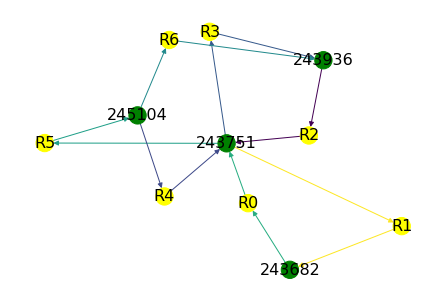

In [ ]:
draw_graph (rules,8) 

* 243682:ANTIMONIUM TART 9 CH GR
* 243751:BLATTA ORIENTALIS 9 CH GR
* 243936:CUPRUM METALLICUM 9 CH GR
* 245104:IPECA 9 CH GR 

In [ ]:
#profile = ProfileReport(df_achat, title="Pandas Profiling Report", explorative=True)
#profile

________________________________________________________________________________________________________

___________________________________________________________________________________________________________________________

## Prediction

# KNN

In [ ]:
df_achat=pd.read_sql_query('Select dI.*,fp.* from Fact_Purchase fp inner join Dim_Item dI on dI.Item_PK=fp.CodeArticle where Category_ID!=19 and Category_ID!=20 and Category_ID!=21',pcon1)

Nombre d'exemples/Categorie

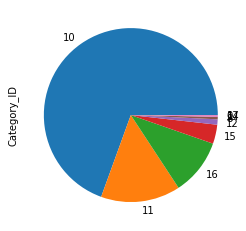

In [ ]:
df_achat['Category_ID'].value_counts().plot.pie()
plt.show()

In [ ]:
X=df_achat[['CodeFournisseur','Remise','PrixAchatHT','TVA']]

In [ ]:
y=df_achat['Category_ID']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.3)

In [ ]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [ ]:
from sklearn import neighbors 
from sklearn.metrics import f1_score,confusion_matrix,roc_auc_score
a1_list=[]
k_list=[]
for k in range(3,20):
    clf=neighbors.KNeighborsClassifier(n_neighbors=k, p=2,metric='manhattan')
    clf.fit(X_train,y_train)
    pred=clf.predict(X_test)
    a=accuracy_score(y_test,pred)
    
    a1_list.append(a)
    k_list.append(k)

In [ ]:
a1_list

[0.9404410487931932,
 0.9400937662788679,
 0.9369682236499393,
 0.9352318110783122,
 0.9328008334780343,
 0.934189963535336,
 0.9333217572495225,
 0.9336690397638479,
 0.9315853446778954,
 0.9321062684493836,
 0.9315853446778954,
 0.9314117034207328,
 0.9308907796492447,
 0.9301962146205939,
 0.9301962146205939,
 0.9296752908491057,
 0.928980725820455]

In [ ]:
k_list

[3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [ ]:
best_a1=max(a1_list)
best_k=k_list[a1_list.index(best_a1)]        
print("Optimum K value=",best_k," with A1=",best_a1)

Optimum K value= 3  with A1= 0.9404410487931932


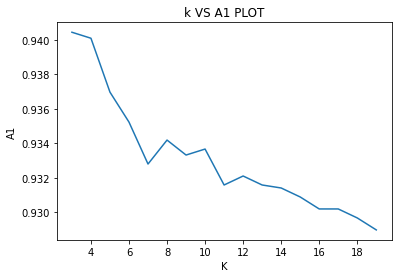

In [ ]:
plt.plot(k_list,a1_list)
plt.title("k VS A1 PLOT")
plt.ylabel("A1")
plt.xlabel("K")
plt.show()

In [ ]:
classifier = KNeighborsClassifier(n_neighbors=4, p=2,metric='manhattan')

In [ ]:
classifier.fit(X_train, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=4)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(classifier.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(classifier.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.96
Accuracy of K-NN classifier on test set: 0.94


In [ ]:
results_prediction_category_id.append(classifier.score(X_train, y_train))
modele_prediction_category_id.append('KNN')
recall_prediction_category_id.append(classifier.score(X_test, y_test))

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[  22    1   14    0    0    0    0    0]
 [   0 3967   23    5    0    1   22    0]
 [   4   58  732    0    0   31    0    0]
 [   0   38    1    9    0    4    0    0]
 [   0   15    3    0    0    0    0    0]
 [   2   24   88    0    0   84    2    0]
 [   0    8    0    0    0    0  600    0]
 [   0    0    1    0    0    0    0    0]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           8       0.79      0.59      0.68        37
          10       0.96      0.99      0.98      4018
          11       0.85      0.89      0.87       825
          12       0.64      0.17      0.27        52
          14       0.00      0.00      0.00        18
          15       0.70      0.42      0.53       200
          16       0.96      0.99      0.97       608
          17       0.00      0.00      0.00         1

    accuracy                           0.94      5759
   macro avg       0.61      0.51      0.54      5759
weighted avg       0.93      0.94      0.93      5759



C:\Users\khali\.conda\envs\BI project\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\khali\.conda\envs\BI project\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\khali\.conda\envs\BI project\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
def BSMOTE(X,y):
# summarize class distribution
    counter = Counter(y)
    print(counter)
# transform the dataset
    X, y = BorderlineSMOTE().fit_resample(X, y)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)
# summarize the new class distribution
    counter = Counter(y)
    print(counter)
    return X_train, X_test, y_train, y_test

In [ ]:
X_train2, X_test2, y_train2, y_test2 = BSMOTE(X, y)

Counter({10: 13332, 11: 2838, 16: 2002, 15: 682, 12: 190, 8: 88, 14: 60, 0: 1, 17: 1})
Counter({10: 13332, 11: 13332, 12: 13332, 15: 13332, 16: 13332, 8: 13332, 14: 13332, 0: 1, 17: 1})


In [ ]:
sc_X = StandardScaler()
X_train2 = sc_X.fit_transform(X_train2)
X_test2 = sc_X.transform(X_test2)

In [ ]:
from sklearn import neighbors 
from sklearn.metrics import f1_score,confusion_matrix,roc_auc_score
a1_list=[]
k_list=[]
for k in range(3,20):
    clf=neighbors.KNeighborsClassifier(n_neighbors=k, p=2,metric='manhattan')
    clf.fit(X_train2,y_train2)
    pred=clf.predict(X_test2)
    a=accuracy_score(y_test2,pred)
    
    a1_list.append(a)
    k_list.append(k)

In [ ]:
a1_list

[0.8876705478962783,
 0.884134581041503,
 0.8900635759697121,
 0.8874919637116937,
 0.8896349739267091,
 0.8897421244374598,
 0.8913493820987214,
 0.8903135938281306,
 0.8879205657546968,
 0.8866704764626044,
 0.8871347953425245,
 0.8847417672690906,
 0.8853489534966783,
 0.8831345096078291,
 0.883634545324666,
 0.8828487749124937,
 0.881812986641903]

In [ ]:
k_list

[3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [ ]:
best_a1=max(a1_list)
best_k=k_list[a1_list.index(best_a1)]        
print("Optimum K value=",best_k," with A1=",best_a1)

Optimum K value= 9  with A1= 0.8913493820987214


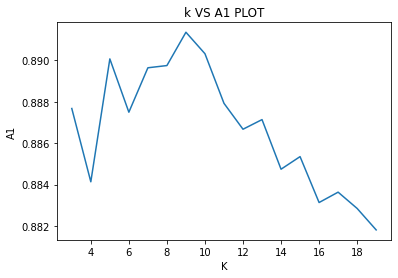

In [ ]:
plt.plot(k_list,a1_list)
plt.title("k VS A1 PLOT")
plt.ylabel("A1")
plt.xlabel("K")
plt.show()

In [ ]:
classifier = KNeighborsClassifier(n_neighbors=5, p=2,metric='manhattan')

In [ ]:
classifier.fit(X_train2, y_train2)

KNeighborsClassifier(metric='manhattan')

In [ ]:
y_pred2 = classifier.predict(X_test2)

In [ ]:
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(classifier.score(X_train2, y_train2)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(classifier.score(X_test2, y_test2)))

Accuracy of K-NN classifier on training set: 0.92
Accuracy of K-NN classifier on test set: 0.89


In [ ]:
results_prediction_category_id.append(classifier.score(X_train2, y_train2))
modele_prediction_category_id.append('Smote KNN')
recall_prediction_category_id.append(classifier.score(X_test2, y_test2))

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test2, y_pred2))

[[3937    1  125    1    0   24    0]
 [   3 3340   50  189  189   33  150]
 [ 229   59 3136   30   77  490   12]
 [   3  168   10 3645   66   10   53]
 [   0  120   45   16 3843    1   16]
 [  99   47  471   43    2 3303    2]
 [   0   99    0   58   86    1 3716]]


In [ ]:
print(classification_report(y_test2, y_pred2))

              precision    recall  f1-score   support

           8       0.92      0.96      0.94      4088
          10       0.87      0.84      0.86      3954
          11       0.82      0.78      0.80      4033
          12       0.92      0.92      0.92      3955
          14       0.90      0.95      0.93      4041
          15       0.86      0.83      0.84      3967
          16       0.94      0.94      0.94      3960

    accuracy                           0.89     27998
   macro avg       0.89      0.89      0.89     27998
weighted avg       0.89      0.89      0.89     27998



# Decision Tree
* Total TTC


In [ ]:
df_Vente

,Category_ID,Shape_ID,CodeClient,CodeArticle,CodePersonnel,Date_D,Time,TotalTTC,Labels
0,0,59,22983,228911,23,2468,42558,17.605,0
1,10,61,20544,228913,25,2561,37198,41.003,0
2,10,61,21172,228913,29,2566,56455,9.784,1
3,10,59,25571,228940,24,2508,41982,104.470,0
4,10,59,24056,228940,24,2486,49266,23.165,0
...,...,...,...,...,...,...,...,...,...
11577,10,1,21963,249661,22,2540,38897,41.415,2
11578,10,1,22379,249661,23,2455,33677,41.000,2
11579,10,1,23440,249661,29,2504,43174,31.115,2
11580,10,31,25586,249688,29,2462,39994,281.756,2


In [ ]:
Y_dt=df_Vente[['TotalTTC']]

In [ ]:
for i in range(len(Y_dt)):
   if Y_dt['TotalTTC'][i]<21:
     Y_dt['TotalTTC'][i]=0
     
   elif 21<=Y_dt['TotalTTC'][i]<51:
     Y_dt['TotalTTC'][i]=1
     
   elif 51<=Y_dt['TotalTTC'][i]<151:
     Y_dt['TotalTTC'][i]=2
     
   else:
     Y_dt['TotalTTC'][i]=3
     
   

In [ ]:
Y_dt.value_counts()

TotalTTC
1.0         5039
2.0         3865
0.0         1733
3.0          945
dtype: int64

In [ ]:
x_names=['Category_ID','Time','Date_D']
y_name=['TotalTTC']

In [ ]:
X_dt=df_Vente[['Category_ID','Time','Date_D']]

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_dt,Y_dt,test_size=0.2,random_state=70)
clf = DecisionTreeClassifier(criterion="gini",splitter='best')  
model_dt=clf.fit(X_train, y_train)  
y_pred=clf.predict(X_test)   

In [ ]:
from sklearn.metrics import accuracy_score
acc = clf.score(X_test, y_test)
print(acc)

0.9413034095813552


In [ ]:
from sklearn.metrics import classification_report
y_pred =model_dt.predict(X_test)

print(classification_report(y_test, y_pred, digits=8 ))

              precision    recall  f1-score   support

         0.0  0.92786885 0.80857143 0.86412214       350
         1.0  0.94263862 0.96571988 0.95403967      1021
         2.0  0.95442359 0.95956873 0.95698925       742
         3.0  0.90909091 0.98039216 0.94339623       204

    accuracy                      0.94130341      2317
   macro avg  0.93350549 0.92856305 0.92963682      2317
weighted avg  0.94122787 0.94130341 0.94046444      2317



In [ ]:
results_prediction_categorie_vente.append(acc)
modele_prediction_categorie_vente.append('Decision Tree')
recall_prediction_categorie_vente.append(acc)

In [ ]:
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_0 <= 10.50
|   |--- feature_2 <= 2440.50
|   |   |--- feature_1 <= 53605.00
|   |   |   |--- feature_1 <= 51555.00
|   |   |   |   |--- feature_2 <= 2438.50
|   |   |   |   |   |--- feature_1 <= 45851.00
|   |   |   |   |   |   |--- feature_2 <= 2437.50
|   |   |   |   |   |   |   |--- feature_1 <= 42913.50
|   |   |   |   |   |   |   |   |--- feature_2 <= 2436.50
|   |   |   |   |   |   |   |   |   |--- feature_1 <= 38717.00
|   |   |   |   |   |   |   |   |   |   |--- class: 2.0
|   |   |   |   |   |   |   |   |   |--- feature_1 >  38717.00
|   |   |   |   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |   |   |--- feature_2 >  2436.50
|   |   |   |   |   |   |   |   |   |--- feature_1 <= 40859.50
|   |   |   |   |   |   |   |   |   |   |--- class: 2.0
|   |   |   |   |   |   |   |   |   |--- feature_1 >  40859.50
|   |   |   |   |   |   |   |   |   |   |--- feature_1 <= 41820.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 3.0
|   |   |   |  

# GridSearch

In [ ]:
param_grid = {'criterion': ['gini', 'entropy'],
             'max_depth': np.arange(1,20)}

In [ ]:
grid = GridSearchCV(DecisionTreeClassifier(random_state=1), param_grid=param_grid, cv=5)

In [ ]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [ ]:
grid.best_params_

{'criterion': 'entropy', 'max_depth': 19}

In [ ]:
final_model = DecisionTreeClassifier(random_state=0, criterion='entropy', max_depth=19)

In [ ]:
final_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=19, random_state=0)

In [ ]:
print( 'le train_score=',final_model.score(X_train, y_train))
print( 'le test_score=',final_model.score(X_test, y_test))

le train_score= 0.9110631408526714
le test_score= 0.8441950798446267


In [ ]:
results_prediction_categorie_vente.append(final_model.score(X_train, y_train))
modele_prediction_categorie_vente.append('GS Decision Tree')
recall_prediction_categorie_vente.append(final_model.score(X_test, y_test))

In [ ]:
from sklearn.metrics import classification_report
y_pred = final_model.predict(X_test)

print(classification_report(y_test, y_pred, digits=8 ))

              precision    recall  f1-score   support

         0.0  0.87096774 0.69428571 0.77265501       350
         1.0  0.83590209 0.90303624 0.86817326      1021
         2.0  0.84441489 0.85579515 0.85006693       742
         3.0  0.85245902 0.76470588 0.80620155       204

    accuracy                      0.84419508      2317
   macro avg  0.85093593 0.80445575 0.82427419      2317
weighted avg  0.84538292 0.84419508 0.84248983      2317



In [ ]:
print(export_text(final_model, feature_names=x_names))

|--- Category_ID <= 10.50
|   |--- Date_D <= 2495.50
|   |   |--- Time <= 63258.00
|   |   |   |--- Time <= 33522.00
|   |   |   |   |--- Date_D <= 2456.50
|   |   |   |   |   |--- Time <= 32801.50
|   |   |   |   |   |   |--- Date_D <= 2450.50
|   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |--- Date_D >  2450.50
|   |   |   |   |   |   |   |--- Date_D <= 2453.50
|   |   |   |   |   |   |   |   |--- class: 2.0
|   |   |   |   |   |   |   |--- Date_D >  2453.50
|   |   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |--- Time >  32801.50
|   |   |   |   |   |   |--- Date_D <= 2447.00
|   |   |   |   |   |   |   |--- class: 3.0
|   |   |   |   |   |   |--- Date_D >  2447.00
|   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |--- Date_D >  2456.50
|   |   |   |   |   |--- Date_D <= 2474.00
|   |   |   |   |   |   |--- Time <= 33220.00
|   |   |   |   |   |   |   |--- Date_D <= 2459.50
|   |   |   |   |   |   |   |   |--- Time <= 31231.00
|   |   |

# Linear Regression 

In [ ]:
#data_A= pd.read_sql_query('SELECT * FROM Dim_Article inner join fact_Vente on fact_vente.item_pk=Dim_Article.codeArticle ',pcon)
data_A= pd.read_sql_query('SELECT * FROM Dim_Article ',pcon)
data_V= pd.read_sql_query('SELECT codearticle,PrixachatTTC,prixVenteTTC FROM Article  ',pcon2)

In [ ]:
data_A.head(7)

,Item_PK,CodeArticle,CodeABarre,CodeForme,CodeCategorie,Rayon
0,1,1,6192402814027,59,0,
1,2,10,A13,13,11,TOI L
2,3,100,3400935272515,61,10,
3,4,1000,3323037664111,13,11,TOI E
4,5,10000,IP2618,0,9,
5,6,10001,PM63434,0,9,
6,7,10002,IP2619,0,9,


In [ ]:
data_V.head(7)

,codearticle,PrixachatTTC,prixVenteTTC
0,1,1.253,1.820
1,10,4.419,6.629
2,100,7.242,9.784
3,1000,6.439,9.659
4,10000,14.583,28.039
5,10001,14.583,28.039
6,10002,0.000,0.000


In [ ]:
data_A.isnull().sum()

Item_PK          0
CodeArticle      0
CodeABarre       0
CodeForme        0
CodeCategorie    0
Rayon            0
dtype: int64

In [ ]:
data=pd.merge(data_A, data_V, left_index=True, right_index=True, how='outer')

In [ ]:
data.head(5)

,Item_PK,CodeArticle,CodeABarre,CodeForme,CodeCategorie,Rayon,codearticle,PrixachatTTC,prixVenteTTC
0,1,1,6192402814027,59,0,,1,1.253,1.820
1,2,10,A13,13,11,TOI L,10,4.419,6.629
2,3,100,3400935272515,61,10,,100,7.242,9.784
3,4,1000,3323037664111,13,11,TOI E,1000,6.439,9.659
4,5,10000,IP2618,0,9,,10000,14.583,28.039


In [ ]:
data_V=data_V.dropna()

<AxesSubplot:>

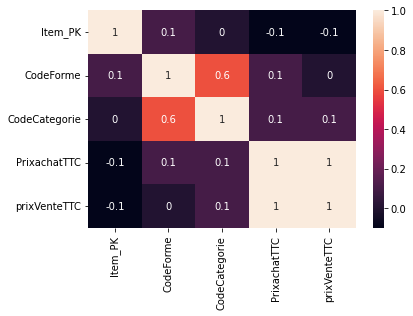

In [ ]:
#etude de la correlation
matrice_corr = data.corr().round(1)
sns.heatmap(data=matrice_corr, annot=True)

In [ ]:
#on utilise seulement 4 variables explicatives
X=pd.DataFrame(np.c_[data['PrixachatTTC'],data['Item_PK'],data['CodeCategorie'],data['CodeForme']], columns = ['PrixachatTTC','Item_PK','CodeCategorie','CodeForme'])
Y = data['prixVenteTTC']
 
#base d'apprentissage et base de test
from sklearn.model_selection import train_test_split
 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)


In [ ]:
lmodellineaire = LinearRegression()
lmodellineaire.fit(X_train, Y_train)

LinearRegression()

In [ ]:
# Evaluation du training set
from sklearn.metrics import r2_score
y_train_predict = lmodellineaire.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

 
print('La performance du modèle sur la base d"apprentissage')
print('--------------------------------------')
print('L"erreur quadratique moyenne est {}'.format(rmse))
print('le score R2 est {}'.format(r2))
print('\n')
results_prediction_vente.append(r2)
# model evaluation for testing set
y_test_predict = lmodellineaire.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

recall_prediction_vente.append(r2)
print('La performance du modèle sur la base de test')
print('--------------------------------------')
print('L"erreur quadratique moyenne est {}'.format(rmse))
print('le score R2 est {}'.format(r2))


La performance du modèle sur la base d"apprentissage
--------------------------------------
L"erreur quadratique moyenne est 6.2800732774875385
le score R2 est 0.9828040686623718


La performance du modèle sur la base de test
--------------------------------------
L"erreur quadratique moyenne est 6.323181607193861
le score R2 est 0.9749785178244925


In [ ]:

modele_prediction_vente.append('Linear Regression')

# SVM

In [ ]:
X=df_achat[['CodeFournisseur','Remise','PrixAchatHT','TVA']]

In [ ]:
y=df_achat['Category_ID']
train_x,test_x,train_y,test_y = train_test_split(X, y, random_state=0, test_size=0.3)

### Params par défaut

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


model =  SVC()

# fit the model with the training data
model.fit(train_x,train_y)


SVC()

In [ ]:

# predict the target on the train dataset
predict_train = model.predict(train_x)
print('Target on train data',predict_train) 

# Accuray Score on train dataset
accuracy_train = accuracy_score(train_y,predict_train)
print('accuracy_score on train dataset : ', accuracy_train)

# predict the target on the test dataset
predict_test = model.predict(test_x)
print('Target on test data',predict_test) 
# Accuracy Score on test dataset
accuracy_test = accuracy_score(test_y,predict_test)
print('accuracy_score on test dataset : ', accuracy_test)

Target on train data [10 10 10 ... 10 10 11]
accuracy_score on train dataset :  0.8307406029028657
Target on test data [10 10 10 ... 10 11 10]
accuracy_score on test dataset :  0.8265323840944608


In [ ]:
results_prediction_category_id.append(accuracy_train)
recall_prediction_category_id.append(accuracy_test)
modele_prediction_category_id.append('Default SVM')

In [ ]:
print(classification_report(predict_test,test_y))

              precision    recall  f1-score   support

           8       0.00      0.00      0.00         0
          10       0.99      0.83      0.91      4781
          11       0.94      0.79      0.86       978
          12       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.00      0.00      0.00         0
          16       0.00      0.00      0.00         0
          17       0.00      0.00      0.00         0

    accuracy                           0.83      5759
   macro avg       0.24      0.20      0.22      5759
weighted avg       0.98      0.83      0.90      5759



C:\Users\khali\.conda\envs\BI project\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\khali\.conda\envs\BI project\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\khali\.conda\envs\BI project\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### RBF

In [ ]:
svm = SVC(kernel="rbf")
svm.fit(train_x,train_y)
from sklearn.metrics import classification_report
y_pred = svm.predict(test_x)
print(classification_report(y_pred, test_y))

              precision    recall  f1-score   support

           8       0.00      0.00      0.00         0
          10       0.99      0.83      0.91      4781
          11       0.94      0.79      0.86       978
          12       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.00      0.00      0.00         0
          16       0.00      0.00      0.00         0
          17       0.00      0.00      0.00         0

    accuracy                           0.83      5759
   macro avg       0.24      0.20      0.22      5759
weighted avg       0.98      0.83      0.90      5759



C:\Users\khali\.conda\envs\BI project\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\khali\.conda\envs\BI project\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\khali\.conda\envs\BI project\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
svm = SVC(kernel="sigmoid")
svm.fit(train_x,train_y)
from sklearn.metrics import classification_report
y_pred_svc_4 = svm.predict(test_x)
print(classification_report(y_pred_svc_4,test_y))

              precision    recall  f1-score   support

           8       0.00      0.00      0.00         0
          10       0.90      0.77      0.83      4654
          11       0.18      0.21      0.19       699
          12       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.00      0.00      0.00         0
          16       0.00      0.00      0.00       406
          17       0.00      0.00      0.00         0

    accuracy                           0.65      5759
   macro avg       0.13      0.12      0.13      5759
weighted avg       0.75      0.65      0.70      5759



C:\Users\khali\.conda\envs\BI project\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\khali\.conda\envs\BI project\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\khali\.conda\envs\BI project\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print("Meilleurs paramétres trouvés par GridSeachCV")
print(grid.best_params_)


Meilleurs paramétres trouvés par GridSeachCV
{'criterion': 'entropy', 'max_depth': 19}


In [ ]:
svm = SVC(kernel="rbf",gamma=0.1,C=1000)
svm.fit(train_x,train_y)
from sklearn.metrics import classification_report
train_pred=svm.predict(train_x)
y_pred = svm.predict(test_x)
print(classification_report(y_pred, test_y))
accuracy_train = accuracy_score(train_y,train_pred)

accuracy_test = accuracy_score(test_y,y_pred)

              precision    recall  f1-score   support

           8       0.32      0.48      0.39        25
          10       0.96      0.96      0.96      4042
          11       0.89      0.84      0.87       874
          12       0.00      0.00      0.00         3
          14       0.00      0.00      0.00         0
          15       0.42      0.69      0.52       121
          16       0.94      0.82      0.88       694
          17       0.00      0.00      0.00         0

    accuracy                           0.91      5759
   macro avg       0.44      0.47      0.45      5759
weighted avg       0.93      0.91      0.92      5759



C:\Users\khali\.conda\envs\BI project\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\khali\.conda\envs\BI project\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\khali\.conda\envs\BI project\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
results_prediction_category_id.append(accuracy_train)
recall_prediction_category_id.append(accuracy_test)
modele_prediction_category_id.append('RBF SVM')

## BSMOTE

In [ ]:
X_train2, X_test2, y_train2, y_test2 = BSMOTE(X, y)

Counter({10: 13332, 11: 2838, 16: 2002, 15: 682, 12: 190, 8: 88, 14: 60, 0: 1, 17: 1})
Counter({10: 13332, 11: 13332, 12: 13332, 15: 13332, 16: 13332, 8: 13332, 14: 13332, 0: 1, 17: 1})


In [ ]:
sc_X = StandardScaler()
X_train2 = sc_X.fit_transform(X_train2)
X_test2 = sc_X.transform(X_test2)

In [ ]:
svm = SVC(kernel="rbf",gamma=0.1,C=1000)
svm.fit(X_train2,y_train2)
train_pred2 = svm.predict(X_train2)

y_pred2 = svm.predict(X_test2)
print(classification_report(y_pred2,y_test2))

              precision    recall  f1-score   support

           8       1.00      0.74      0.85      5516
          10       0.50      0.72      0.59      2721
          11       0.40      0.67      0.51      2418
          12       0.90      0.78      0.83      4557
          14       0.97      0.78      0.86      5037
          15       0.57      0.65      0.61      3439
          16       0.85      0.78      0.82      4310

    accuracy                           0.74     27998
   macro avg       0.74      0.73      0.72     27998
weighted avg       0.80      0.74      0.76     27998



In [ ]:
accuracy_train = accuracy_score(y_train2,train_pred2)

accuracy_test = accuracy_score(y_test2,y_pred2)

In [ ]:
results_prediction_category_id.append(accuracy_train)
recall_prediction_category_id.append(accuracy_test)
modele_prediction_category_id.append('BSMOTE SVM')

In [ ]:
print(modele_prediction_category_id)

['KNN', 'Smote KNN', 'Default SVM', 'RBF SVM', 'BSMOTE SVM']


# Catboost

In [ ]:
X_dt=df_Vente[['Category_ID','Time','Date_D','CodeArticle']]

In [ ]:
Y_dt=df_Vente[['TotalTTC']]

In [ ]:
for i in range(len(Y_dt)):
   if Y_dt['TotalTTC'][i]<21:
     Y_dt['TotalTTC'][i]=0
     
   elif 21<=Y_dt['TotalTTC'][i]<51:
     Y_dt['TotalTTC'][i]=1
     
   elif 51<=Y_dt['TotalTTC'][i]<151:
     Y_dt['TotalTTC'][i]=2
     
   else:
     Y_dt['TotalTTC'][i]=3

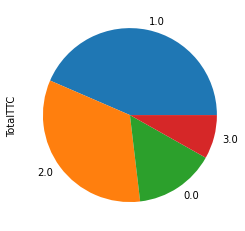

In [ ]:
Y_dt['TotalTTC'].value_counts().plot.pie()
plt.show()

In [ ]:
train_x,test_x,train_y,test_y = train_test_split(X_dt, Y_dt, random_state=0, test_size=0.2)

In [ ]:
def get_categorical_indicies(X):
    cats = []
    for col in X.columns:
        if is_numeric_dtype(X[col]):
            pass
        else:
            cats.append(col)
    cat_indicies = []
    for col in cats:
        cat_indicies.append(X.columns.get_loc(col))
    return cat_indicies
categorical_indicies = get_categorical_indicies(X_dt)


In [ ]:
def convert_cats(X):
    cats = []
    for col in X.columns:
        if is_numeric_dtype(X[col]):
            pass
        else:
            cats.append(col)
    cat_indicies = []
    for col in cats:
        X[col] = X[col].astype('category')
convert_cats(X_dt)


In [ ]:
train_dataset = cb.Pool(train_x,train_y, 
                        cat_features=categorical_indicies)                                                      
test_dataset = cb.Pool(test_x,test_y,           
                       cat_features=categorical_indicies)
                       
  
model = cb.CatBoostClassifier(
    custom_loss=['Accuracy'],
    random_seed=42,
    logging_level='Silent'
)
grid = {'learning_rate': [0.03, 0.1],
        'depth': [4, 6, 10],
        'l2_leaf_reg': [1, 3, 5,],
        'iterations': [50, 100, 150]}
        
 
model.grid_search(grid,train_dataset)
pred = model.predict(test_x)

0:	loss: 1.1892233	best: 1.1892233 (0)	total: 350ms	remaining: 18.5s
1:	loss: 1.1531029	best: 1.1531029 (1)	total: 535ms	remaining: 13.9s
2:	loss: 1.1913842	best: 1.1531029 (1)	total: 722ms	remaining: 12.3s
3:	loss: 1.1551561	best: 1.1531029 (1)	total: 888ms	remaining: 11.1s
4:	loss: 1.1921398	best: 1.1531029 (1)	total: 1.1s	remaining: 10.8s
5:	loss: 1.1569816	best: 1.1531029 (1)	total: 1.33s	remaining: 10.7s
6:	loss: 1.1649748	best: 1.1531029 (1)	total: 1.82s	remaining: 12.2s
7:	loss: 1.1369077	best: 1.1369077 (7)	total: 2.15s	remaining: 12.4s
8:	loss: 1.1657077	best: 1.1369077 (7)	total: 2.46s	remaining: 12.3s
9:	loss: 1.1401740	best: 1.1369077 (7)	total: 2.81s	remaining: 12.4s
10:	loss: 1.1664303	best: 1.1369077 (7)	total: 3.13s	remaining: 12.2s
11:	loss: 1.1430258	best: 1.1369077 (7)	total: 3.43s	remaining: 12s
12:	loss: 1.1561946	best: 1.1369077 (7)	total: 3.98s	remaining: 12.6s
13:	loss: 1.1205682	best: 1.1205682 (13)	total: 4.45s	remaining: 12.7s
14:	loss: 1.1569257	best: 1.1205

In [ ]:
print(classification_report(test_y, pred))

              precision    recall  f1-score   support

         0.0       0.59      0.05      0.10       370
         1.0       0.51      0.88      0.65       983
         2.0       0.62      0.46      0.52       770
         3.0       0.87      0.17      0.28       194

    accuracy                           0.55      2317
   macro avg       0.65      0.39      0.39      2317
weighted avg       0.59      0.55      0.49      2317



In [ ]:
X_train3, X_test3, y_train3, y_test3 = BSMOTE(X_dt, Y_dt)

Counter({'TotalTTC': 1})
Counter({'TotalTTC': 1})


In [ ]:
sc_X = StandardScaler()
X_train3 = sc_X.fit_transform(X_train3)
X_test3 = sc_X.transform(X_test3)

In [ ]:
train_dataset = cb.Pool(X_train3, y_train3, 
                        cat_features=categorical_indicies)                                                      
test_dataset = cb.Pool( X_test3,y_test3,           
                       cat_features=categorical_indicies)
                       
  
model = cb.CatBoostClassifier(
    custom_loss=['Accuracy'],
    random_seed=42,
    logging_level='Silent'
)
grid = {'learning_rate': [0.03, 0.1],
        'depth': [4, 6, 10],
        'l2_leaf_reg': [1, 3, 5,],
        'iterations': [50, 100, 150]}
        
 
model.grid_search(grid,train_dataset)
pred = model.predict( X_test3)
pred_test = model.predict( X_train3)


0:	loss: 1.3261894	best: 1.3261894 (0)	total: 325ms	remaining: 17.2s
1:	loss: 1.2901002	best: 1.2901002 (1)	total: 612ms	remaining: 15.9s
2:	loss: 1.3281042	best: 1.2901002 (1)	total: 935ms	remaining: 15.9s
3:	loss: 1.2899644	best: 1.2899644 (3)	total: 1.25s	remaining: 15.7s
4:	loss: 1.3283321	best: 1.2899644 (3)	total: 1.55s	remaining: 15.2s
5:	loss: 1.2944254	best: 1.2899644 (3)	total: 1.85s	remaining: 14.8s
6:	loss: 1.3060001	best: 1.2899644 (3)	total: 2.42s	remaining: 16.3s
7:	loss: 1.2519072	best: 1.2519072 (7)	total: 2.98s	remaining: 17.2s
8:	loss: 1.3078666	best: 1.2519072 (7)	total: 3.59s	remaining: 18s
9:	loss: 1.2554146	best: 1.2519072 (7)	total: 4.18s	remaining: 18.4s
10:	loss: 1.3085111	best: 1.2519072 (7)	total: 4.73s	remaining: 18.5s
11:	loss: 1.2619251	best: 1.2519072 (7)	total: 5.38s	remaining: 18.8s
12:	loss: 1.2906740	best: 1.2519072 (7)	total: 6.3s	remaining: 19.9s
13:	loss: 1.2220589	best: 1.2220589 (13)	total: 7.15s	remaining: 20.4s
14:	loss: 1.2930570	best: 1.2220

In [ ]:
print(classification_report( y_test3, pred))

              precision    recall  f1-score   support

         0.0       0.53      0.53      0.53      1577
         1.0       0.43      0.46      0.45      1439
         2.0       0.52      0.42      0.46      1465
         3.0       0.66      0.74      0.69      1566

    accuracy                           0.54      6047
   macro avg       0.53      0.54      0.53      6047
weighted avg       0.54      0.54      0.54      6047



In [ ]:
accuracy_train=model.score(X_train3,y_train3)
accuracy_test=model.score(X_test3,y_test3)

In [ ]:
print(accuracy_train)

0.5396064164048289


In [ ]:
results_prediction_categorie_vente.append(accuracy_train)
recall_prediction_categorie_vente.append(accuracy_test)
modele_prediction_categorie_vente.append('Catboost')

# XGBOOST

In [ ]:
from xgboost import XGBClassifier
import pandas as pd
import warnings
import pyodbc 
import pygrametl
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)
import numpy as np
import joblib
from sklearn import cluster 
from matplotlib import pyplot as plt
import tkinter
from scipy.cluster.hierarchy import dendrogram, linkage,fcluster
from pandas.plotting import scatter_matrix 
from sklearn import metrics
from apyori import apriori
from sklearn import metrics
import numpy as np
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.tree import export_text
import catboost as cb
from catboost import Pool
from sklearn.metrics import classification_report
from pandas.api.types import is_numeric_dtype
import imblearn
from collections import Counter
from imblearn.over_sampling import BorderlineSMOTE
from matplotlib import pyplot
from numpy import where
from sklearn.metrics import recall_score
from sklearn import neighbors 
from sklearn.metrics import f1_score,confusion_matrix,roc_auc_score
pcon1= pyodbc.connect('Driver={SQL Server};'
                      'Server=KHALILSRIDI;'
                      'Database=pharma_DW;'
                      'Trusted_Connection=yes;')
conn5= pygrametl.ConnectionWrapper(connection=pcon1)
df_Vente= pd.read_sql_query('SELECT * FROM Dim_Item a inner join fact_sale fs on fs.CodeArticle=a.Item_PK ',pcon1)
df_Vente=df_Vente[['Category_ID','Shape_ID','CodeClient','CodeArticle','CodePersonnel','Date_D','Time','TotalTTC']]
X_dt=df_Vente[['Time','Date_D']]
Y_dt=df_Vente[['TotalTTC']]
def BSMOTE(X,y):
# summarize class distribution
    counter = Counter(y)
    print(counter)
# transform the dataset
    X, y = BorderlineSMOTE().fit_resample(X, y)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)
# summarize the new class distribution
    counter = Counter(y)
    print(counter)
    return X_train, X_test, y_train, y_test


for i in range(len(Y_dt)):
   if Y_dt['TotalTTC'][i]<21:
     Y_dt['TotalTTC'][i]=0
     
   elif 21<=Y_dt['TotalTTC'][i]<51:
     Y_dt['TotalTTC'][i]=1
     
   elif 51<=Y_dt['TotalTTC'][i]<151:
     Y_dt['TotalTTC'][i]=2
     
   else:
     Y_dt['TotalTTC'][i]=3
X_train, X_test, y_train, y_test = BSMOTE(X_dt, Y_dt)
sc_X = StandardScaler()
X_train= sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)


XGB = XGBClassifier(max_depth = 6,min_samples_leaf=1)
XGB.fit(X_train, y_train)
y_pred_xgb = XGB.predict(X_test)
cm_xgb = confusion_matrix(y_pred_xgb, y_test)
acc_xgb = accuracy_score(y_test, y_pred_xgb)

y_pred_xgb2 = XGB.predict(X_train)

acc_xgb2 = accuracy_score(y_train, y_pred_xgb2)


print("RESULT")
print("XGBoost Model Acc : ",acc_xgb)
print(XGB.get_params (deep = True))

Counter({'TotalTTC': 1})
Counter({'TotalTTC': 1})
[00:31:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:31:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\khali\.conda\envs\BI project\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\khali\.conda\envs\BI project\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\khali\.conda\envs\BI project\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y

RESULT
XGBoost Model Acc :  0.836447825367951
{'objective': 'multi:softprob', 'use_label_encoder': True, 'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 1, 'enable_categorical': False, 'gamma': 0, 'gpu_id': -1, 'importance_type': None, 'interaction_constraints': '', 'learning_rate': 0.300000012, 'max_delta_step': 0, 'max_depth': 6, 'min_child_weight': 1, 'missing': nan, 'monotone_constraints': '()', 'n_estimators': 100, 'n_jobs': 12, 'num_parallel_tree': 1, 'predictor': 'auto', 'random_state': 0, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': None, 'subsample': 1, 'tree_method': 'exact', 'validate_parameters': 1, 'verbosity': None, 'min_samples_leaf': 1}


In [ ]:
print(classification_report(y_test,y_pred_xgb ))

              precision    recall  f1-score   support

         0.0       0.82      0.78      0.80      1577
         1.0       0.78      0.78      0.78      1439
         2.0       0.81      0.84      0.82      1465
         3.0       0.92      0.94      0.93      1566

    accuracy                           0.84      6047
   macro avg       0.83      0.84      0.83      6047
weighted avg       0.84      0.84      0.84      6047



In [ ]:
print(acc_xgb)

0.836447825367951


In [ ]:
results_prediction_categorie_vente.append(acc_xgb)
modele_prediction_categorie_vente.append('XGBoost')
recall_prediction_categorie_vente.append(acc_xgb)

# Time Series

 # Final results comparaison

In [ ]:
models_prediction_vente = pd.DataFrame({"Model Name":modele_prediction_vente,
                        "Model Result":results_prediction_vente, 
                        "Model Recall":recall_prediction_vente
                        })


In [ ]:
models_prediction_categorie_vente = pd.DataFrame({"Model Name":modele_prediction_categorie_vente,
                        "Model Result":results_prediction_categorie_vente, 
                        "Model Recall":recall_prediction_categorie_vente
                        })

In [ ]:
models_prediction_category_id = pd.DataFrame({"Model Name":modele_prediction_category_id,
                        "Model Result":results_prediction_category_id, 
                        "Model Recall":recall_prediction_category_id
                        })

In [ ]:
models_prediction_categorie_vente

,Model Name,Model Result,Model Recall
0,Decision Tree,0.941303,0.941303
1,GS Decision Tree,0.911063,0.844195
2,XGBoost,0.836448,0.836448
3,Catboost,0.648664,0.539606


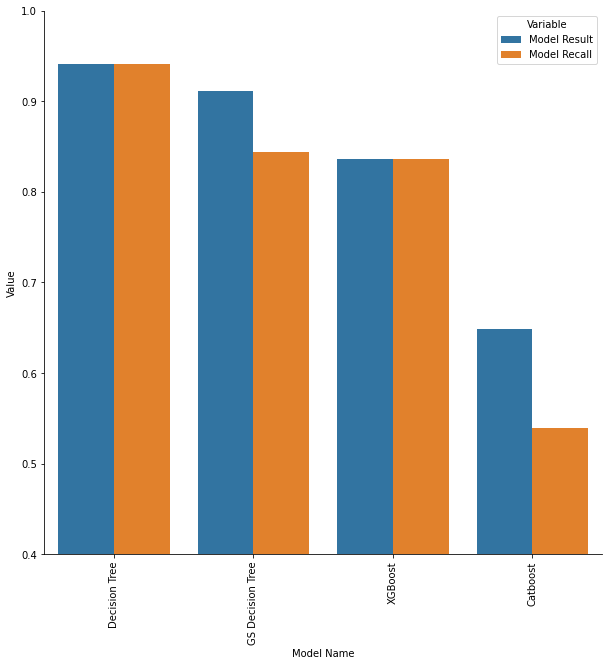

In [ ]:
fig, ax1 = pyplot.subplots(figsize=(10, 10))
tidy = models_prediction_categorie_vente.melt(id_vars='Model Name').rename(columns=str.title)
g = sns.barplot(x='Model Name', y='Value', hue='Variable', data=tidy, ax=ax1)
g.set(ylim=(0.4, 1.0))
g.set_xticklabels(
    labels=models_prediction_categorie_vente['Model Name'], rotation=90)
sns.despine(fig)

In [ ]:
models_prediction_category_id

,Model Name,Model Result,Model Recall
0,KNN,0.956680,0.940094
1,Smote KNN,0.916116,0.890064
2,Default SVM,0.830741,0.826532
3,RBF SVM,0.928024,0.914742
4,BSMOTE SVM,0.736499,0.740660


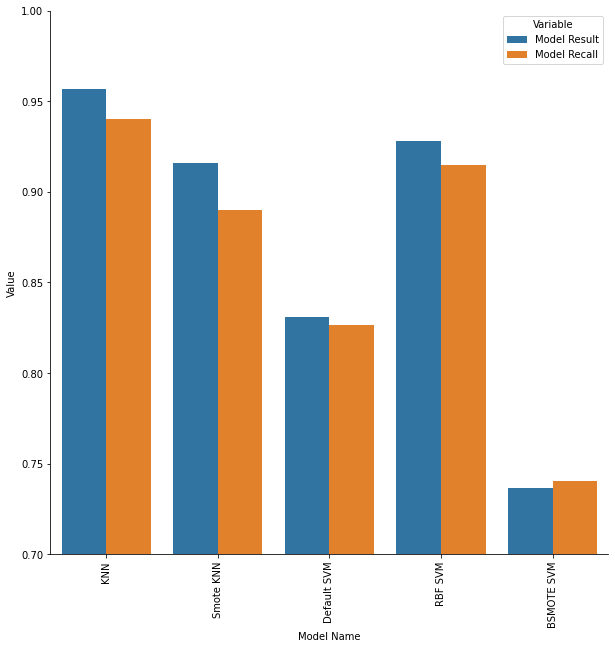

In [ ]:
fig, ax1 = pyplot.subplots(figsize=(10, 10))
tidy = models_prediction_category_id.melt(id_vars='Model Name').rename(columns=str.title)
g = sns.barplot(x='Model Name', y='Value', hue='Variable', data=tidy, ax=ax1)
g.set(ylim=(0.7, 1.0))
g.set_xticklabels(
    labels=models_prediction_category_id['Model Name'], rotation=90)
sns.despine(fig)

In [ ]:
models_prediction_vente

,Model Name,Model Result,Model Recall
0,Linear Regression,0.982804,0.974979


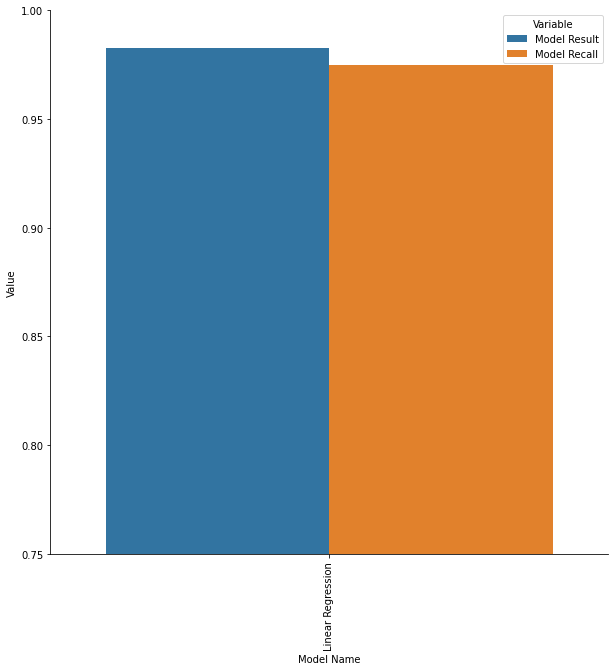

In [ ]:
fig, ax1 = pyplot.subplots(figsize=(10, 10))
tidy = models_prediction_vente.melt(id_vars='Model Name').rename(columns=str.title)
g = sns.barplot(x='Model Name', y='Value', hue='Variable', data=tidy, ax=ax1)
g.set(ylim=(0.75, 1.00))
g.set_xticklabels(
    labels=models_prediction_vente['Model Name'], rotation=90)
sns.despine(fig)